 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [434]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [435]:
# Reading whale returns
whale_returns_df = pd.read_csv("../Starter_Code 2/Resources/whale_returns.csv", index_col='Date', infer_datetime_format=True , parse_dates=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [436]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [437]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [438]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv("../Starter_Code 2/Resources/algo_returns.csv", index_col='Date', infer_datetime_format=True , parse_dates=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [439]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [440]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [441]:
# Reading S&P 500 Closing Prices
sp500_history_df = pd.read_csv("../Starter_Code 2/Resources/sp500_history.csv", index_col='Date', infer_datetime_format=True , parse_dates=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [442]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [443]:
# Fix Data Types


sp500_history_df['Close'] = sp500_history_df.Close.str.replace('$' ,'')
sp500_history_df['Close'] = sp500_history_df.Close.astype('float', copy=True)

#NEED TO FIX DATE STILL
#sp500_history_df['Date'] = pd.to_datetime(sp500_history_df['Date'], format='%Y%m%d')

sp500_history_df.head()

/var/folders/dx/8m8b_r_57793yl3byvym44sh0000gn/T/ipykernel_27318/3636128603.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df['Close'] = sp500_history_df.Close.str.replace('$' ,'')


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [444]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [445]:
# Calculate Daily Returns
daily_returns = sp500_history_df.pct_change()
daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [446]:
# Drop nulls
daily_returns = daily_returns.dropna()
#daily_returns.isnull().sum()
#daily_returns

In [447]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df = daily_returns
sp500_returns_df.columns
column_names = ['sp500']
sp500_returns_df.columns = column_names
sp500_returns_df

sp500_returns_df

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [448]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolios_returns_df = pd.concat([whale_returns_df,algo_returns_df,sp500_returns_df], axis=1 , join='inner')
portfolios_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

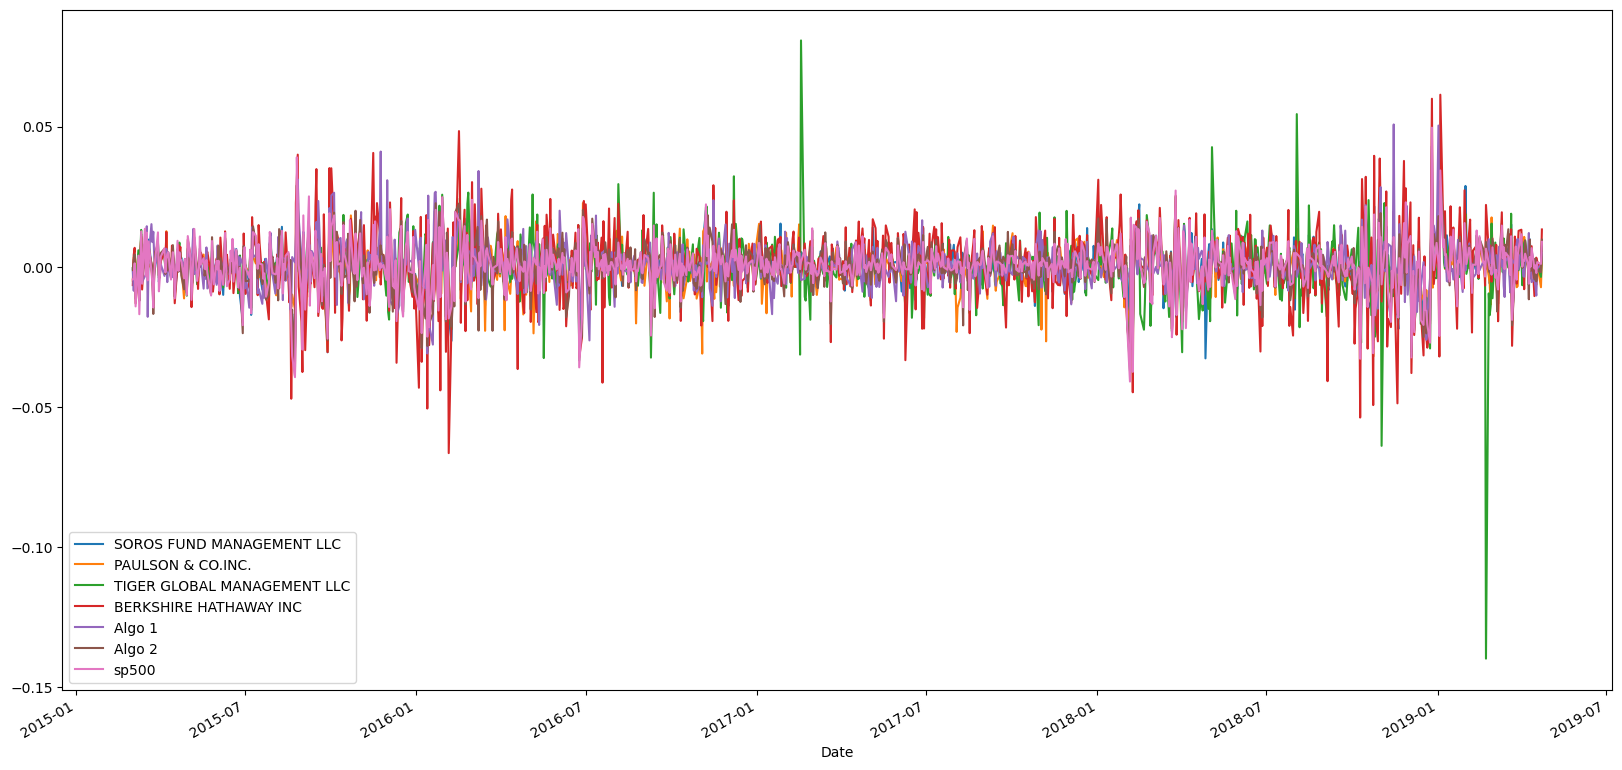

In [449]:
# Plot daily returns of all portfolios
portfolios_returns_df.plot(figsize=(20,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

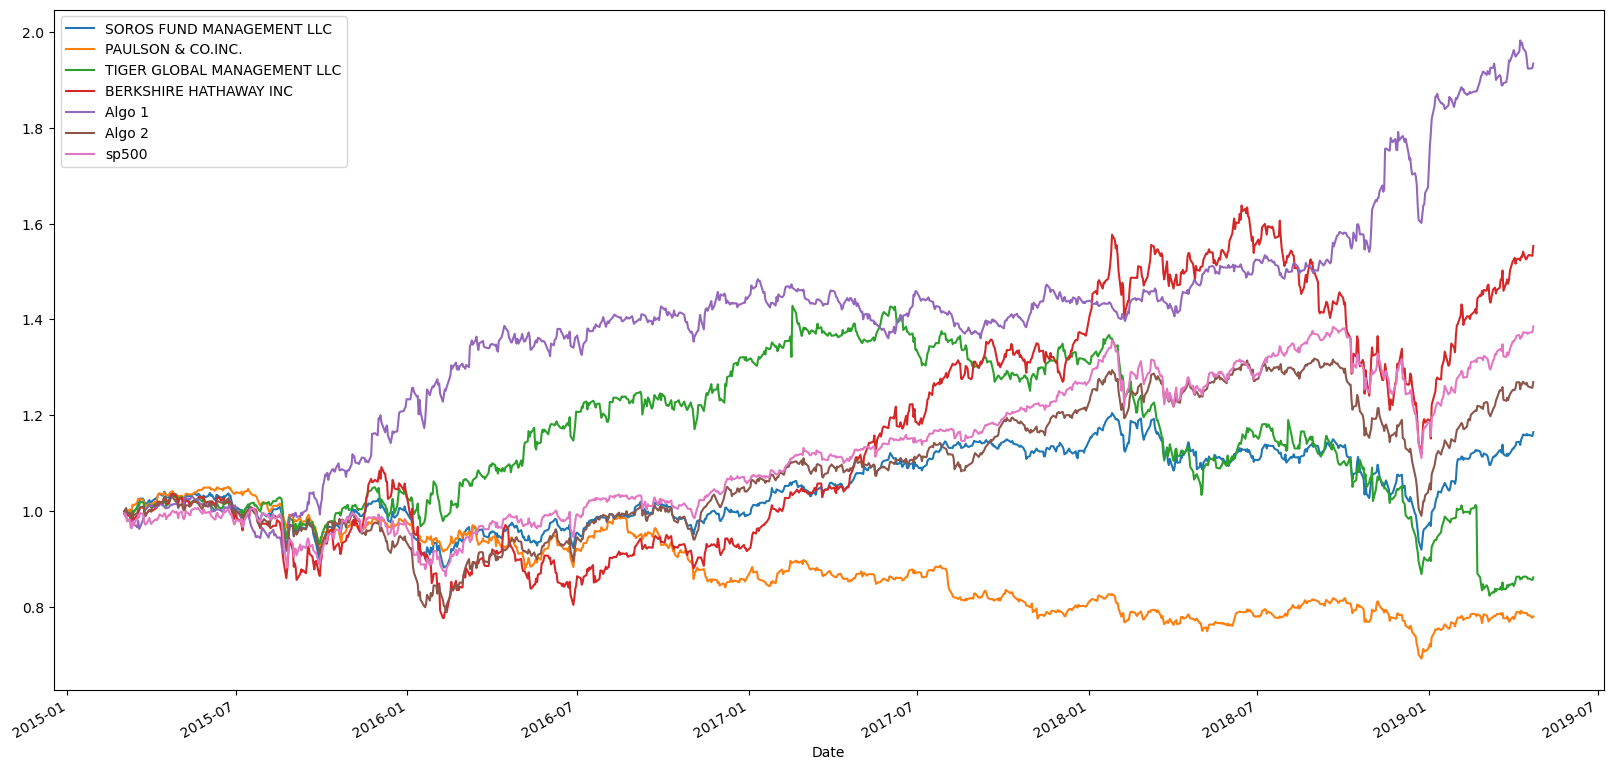

In [450]:
# Calculate cumulative returns of all portfolios
portfolios_returns_cumulative_df = (1 + portfolios_returns_df).cumprod()

# Plot cumulative returns
portfolios_returns_cumulative_df.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

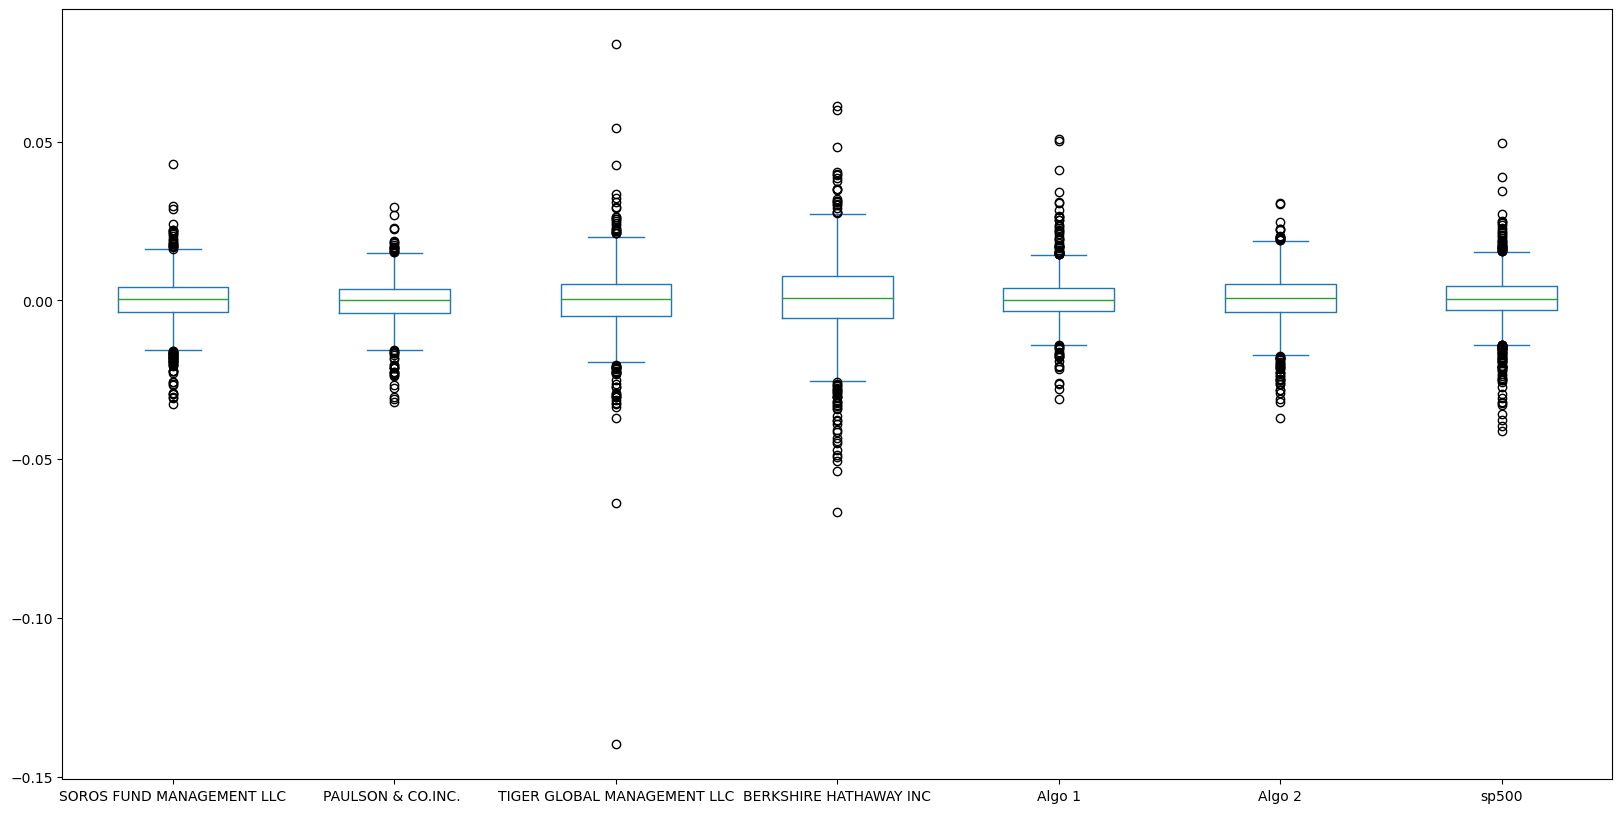

In [451]:
# Box plot to visually show risk
portfolios_returns_df.plot.box(figsize=(20,10))


### Calculate Standard Deviations

In [452]:
# Calculate the daily standard deviations of all portfolios
portfolios_returns_df.std()


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [453]:
# Calculate  the daily standard deviation of S&P 500
ports_std = portfolios_returns_df.std().sort_values(ascending=False)
print(f"the daily standard deviation of the sp500 is: {ports_std['sp500']}")

# Determine which portfolios are riskier than the S&P 500

ports_std['sp500'] < ports_std



the daily standard deviation of the sp500 is: 0.008553731597758204


BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
sp500                          False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

### Calculate the Annualized Standard Deviation

In [454]:
# Calculate the annualized standard deviation (252 trading days)
annual_returns_std = portfolios_returns_df.std()*np.sqrt(252)
annual_returns_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

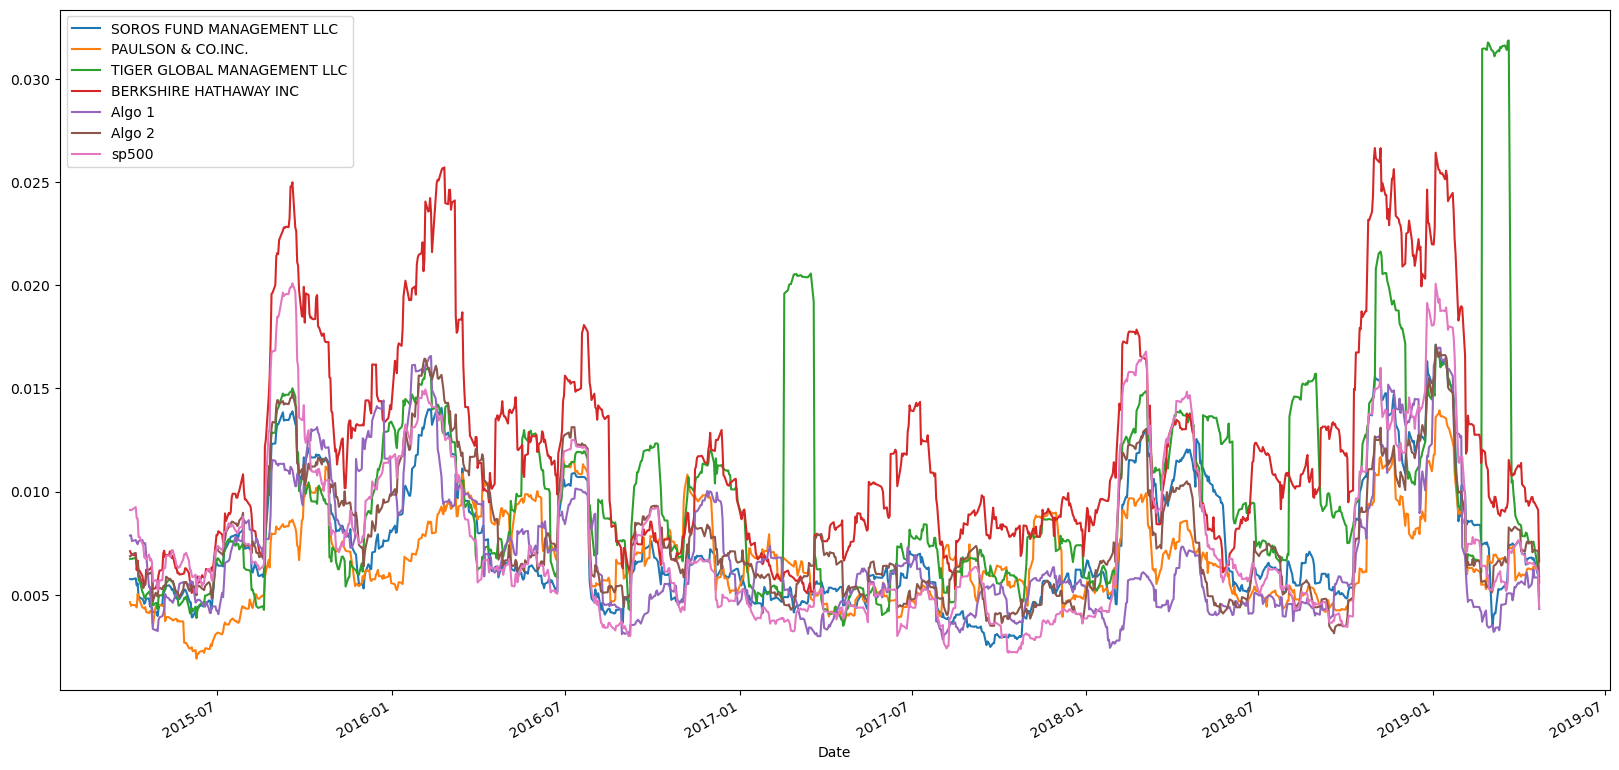

In [455]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_df = portfolios_returns_df.rolling(window=21).std()
rolling_df
# Plot the rolling standard deviation
rolling_df.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

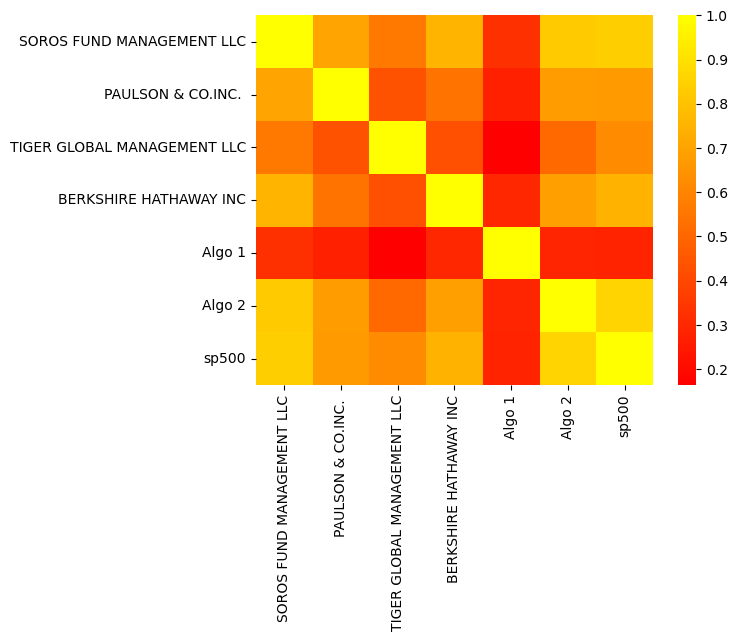

In [456]:
# Calculate the correlation
import seaborn as sns
correlation = portfolios_returns_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, cmap='autumn')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

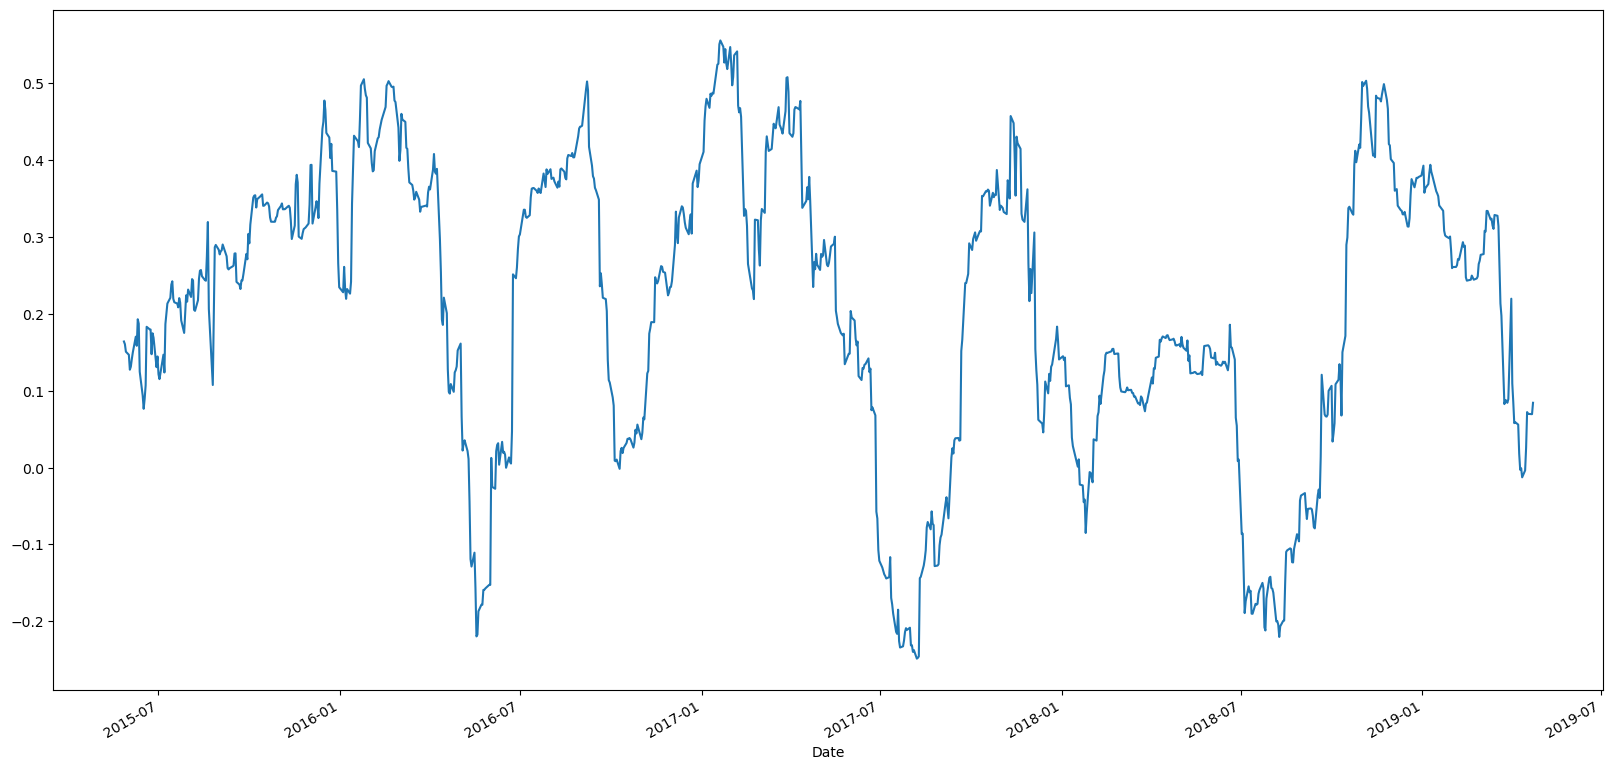

In [457]:
# Calculate covariance of a single portfolio
algo1_covariance = portfolios_returns_df['Algo 1'].rolling(window=60).cov(portfolios_returns_df['sp500'])
algo1_covariance
# Calculate variance of S&P 500
sp500_variance = portfolios_returns_df['sp500'].rolling(window=60).var()
sp500_variance
# Computing beta
algo1_beta = algo1_covariance/sp500_variance
# Plot beta trend
algo1_beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

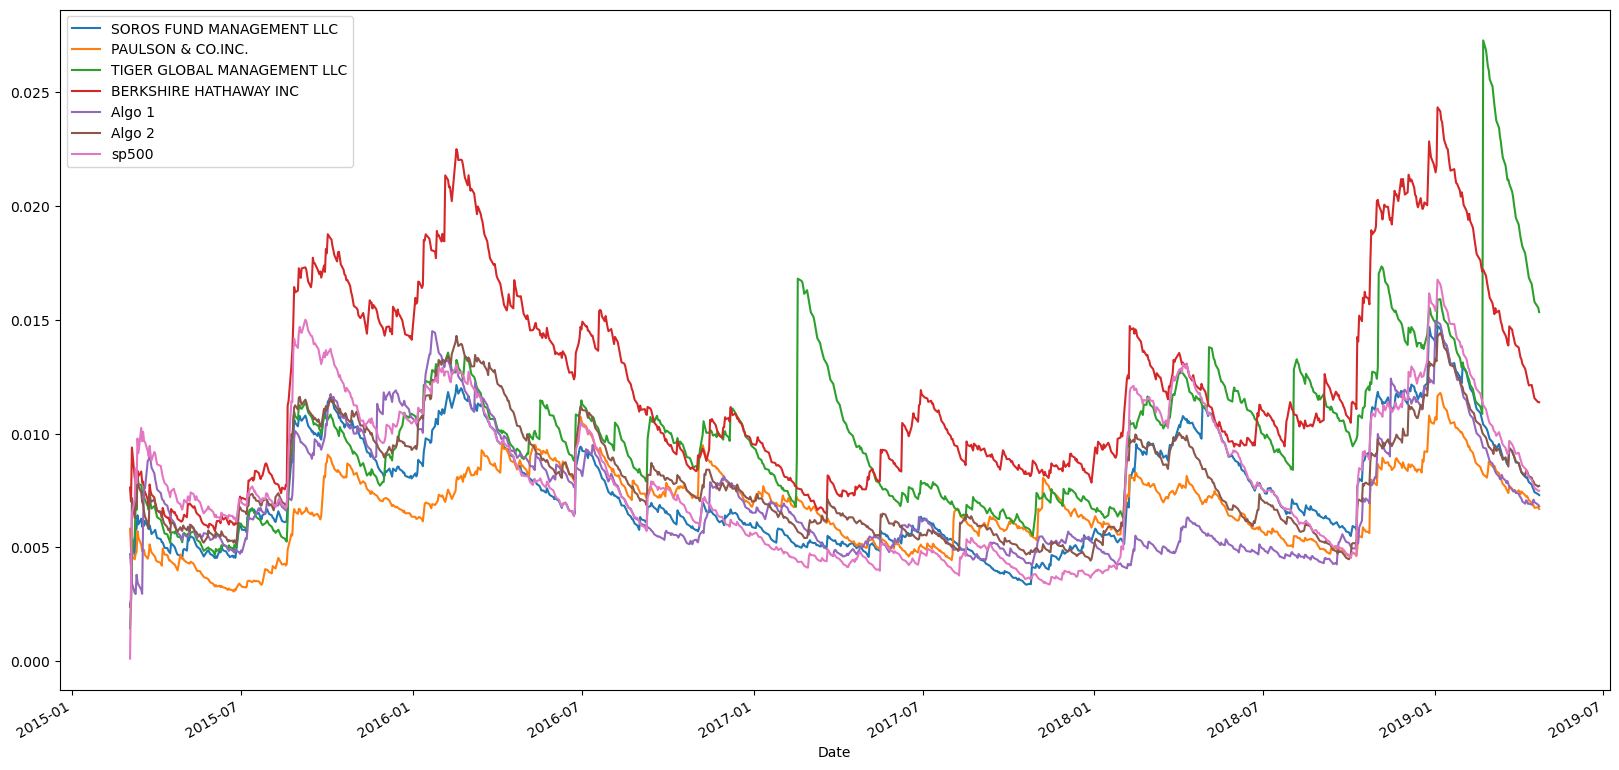

In [458]:
# Use `ewm` to calculate the rolling window
exponentially_weighted_average = portfolios_returns_df.ewm(halflife=21).std()
exponentially_weighted_average.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [459]:
# Annualized Sharpe Ratios
sharpe_ratios = portfolios_returns_df.mean()*252/(portfolios_returns_df.std()*np.sqrt(252))


<AxesSubplot:>

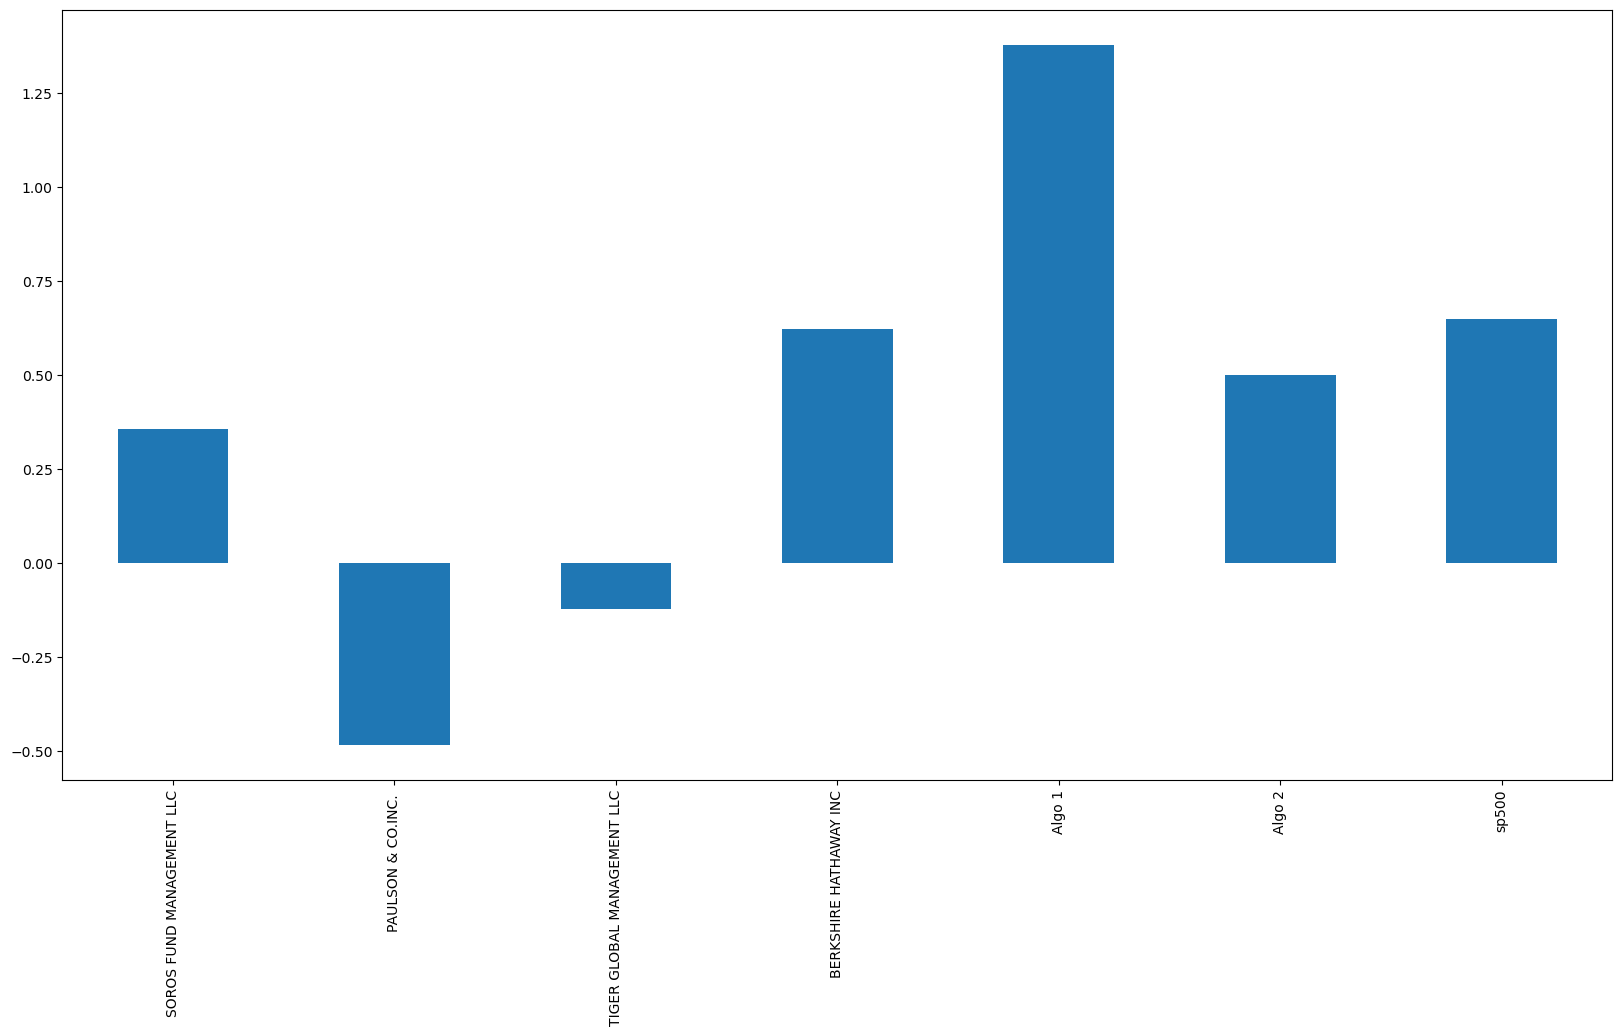

In [460]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

algo 1 outperforms sp500 and whale portfolio returns. algo2 did not outperform the sp500 nor all of the whale portfolio 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [461]:
# Reading data from 1st stock
aapl_df = pd.read_csv('../Starter_Code 2/Resources/aapl_historical.csv', index_col='Trade DATE', infer_datetime_format=True , parse_dates=True)
aapl_df.rename(columns = {"NOCP":"AAPL Close"}, inplace = True)
aapl_df.drop(columns='Symbol', axis=1, inplace= True)
aapl_df

,AAPL Close
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [462]:
# Reading data from 2nd stock
goog_df = pd.read_csv('../Starter_Code 2/Resources/goog_historical.csv', index_col='Trade DATE', infer_datetime_format=True , parse_dates=True)
goog_df.rename(columns = {"NOCP":"GOOG Close"}, inplace = True)
goog_df.drop(columns='Symbol', axis=1, inplace= True)
goog_df

,GOOG Close
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [463]:
# Reading data from 3rd stock
cost_df = pd.read_csv('../Starter_Code 2/Resources/cost_historical.csv', index_col='Trade DATE', infer_datetime_format=True , parse_dates=True)
cost_df.rename(columns = {"NOCP":"COST Close"}, inplace = True)
cost_df.drop(columns='Symbol', axis=1, inplace= True)
cost_df

,COST Close
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [464]:
# Combine all stocks in a single DataFrame
stocks_close_df = pd.concat([aapl_df,goog_df,cost_df], axis=1, join='inner' )
stocks_close_df = stocks_close_df.sort_index(ascending=True)
stocks_close_df

,AAPL Close,GOOG Close,COST Close
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60
...,...,...,...
2019-05-03,211.75,1185.40,244.62
2019-05-06,208.48,1189.39,244.23
2019-05-07,202.86,1174.10,240.18


In [465]:
# Reset Date index
#data is already cleaned

In [466]:
# Reorganize portfolio data by having a column per symbol
#this is done above

In [467]:
# Calculate daily returns
stocks_returns_df = stocks_close_df.pct_change()
# Drop NAs
stocks_returns_df.dropna(inplace=True)
# Display sample data
stocks_returns_df

,AAPL Close,GOOG Close,COST Close
Trade DATE,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206
...,...,...,...
2019-05-03,0.012431,0.019602,0.007953
2019-05-06,-0.015443,0.003366,-0.001594
2019-05-07,-0.026957,-0.012855,-0.016583


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [468]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
#stock_portfolio_returns_df = stocks_close_df['AAPL Close'] * weights[0] + stocks_close_df['GOOG Close'] * weights[1] + stocks_close_df['COST Close'] * weights[2]
stock_portfolio_returns_df = stocks_returns_df.dot(weights)
# Display sample data
#stock_portfolio_returns_df.column
stock_portfolio_returns_df.head()


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [469]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_portfolio_returns_df = pd.concat([portfolios_returns_df,stock_portfolio_returns_df],axis=1, join='inner' )
portfolio_portfolio_returns_df = portfolio_portfolio_returns_df.rename(columns={0:'STOCKS'})
portfolio_portfolio_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,STOCKS
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [470]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_portfolio_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
sp500                          0
STOCKS                         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [471]:
# Calculate the annualized `std`
portfolio_portfolio_returns_std = portfolio_portfolio_returns_df.std()
annual_portfolio_portfolio_returns_std = portfolio_portfolio_returns_std*np.sqrt(252)
annual_portfolio_portfolio_returns_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
sp500                          0.152054
STOCKS                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

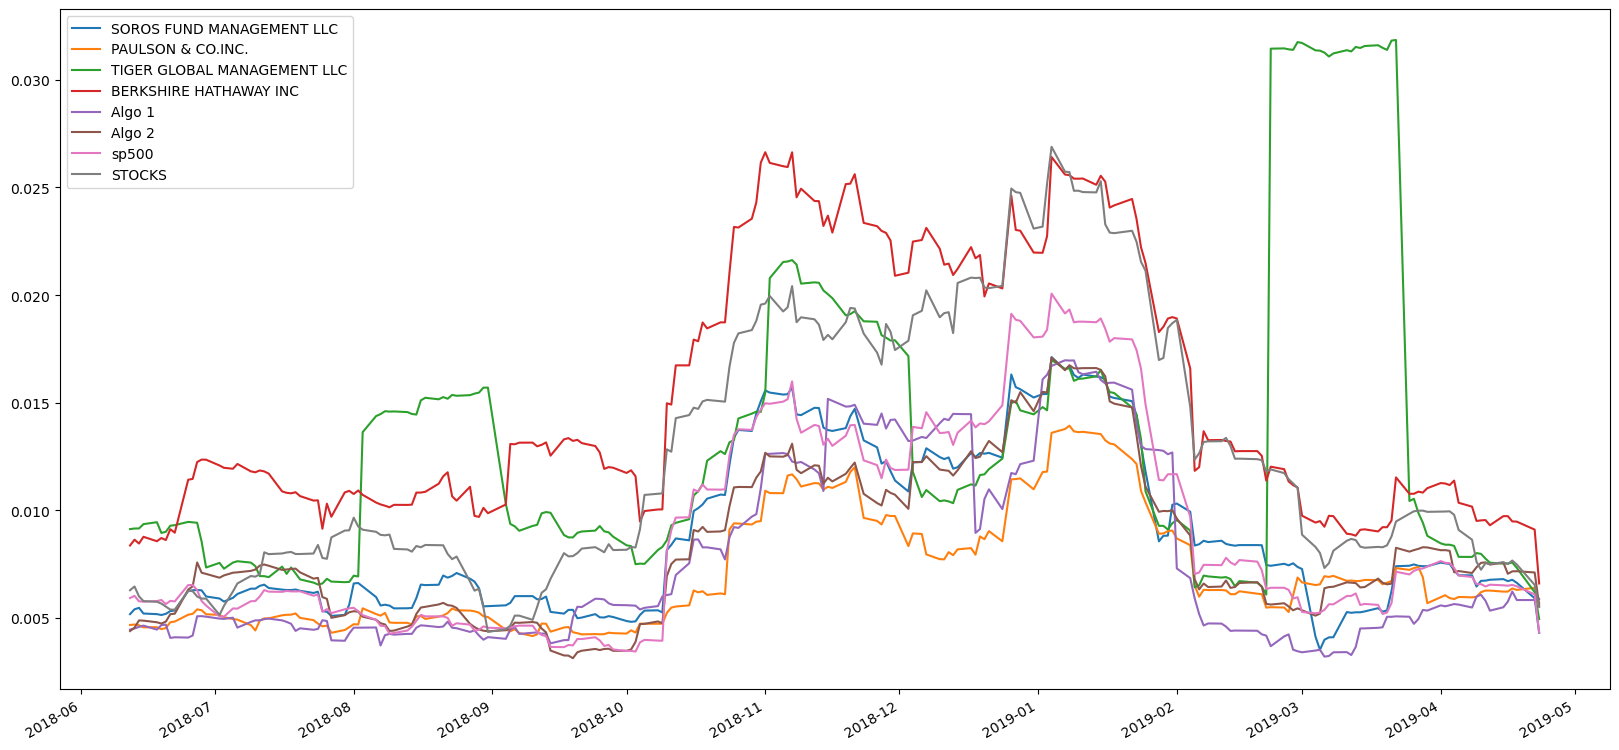

In [472]:
# Calculate rolling standard deviation
portfolio_portfolio_returns_rolling_21Day_std = portfolio_portfolio_returns_df.rolling(window=21).std()
# Plot rolling standard deviation
portfolio_portfolio_returns_rolling_21Day_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

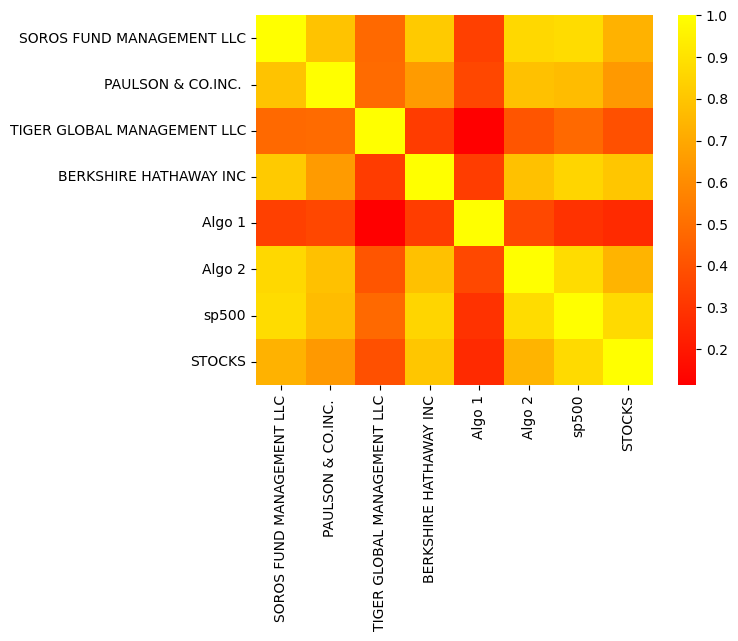

In [473]:
# Calculate and plot the correlation
correlation_portfolio_portfolio_returns_df = portfolio_portfolio_returns_df.corr()
sns.heatmap(correlation_portfolio_portfolio_returns_df, cmap='autumn')


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

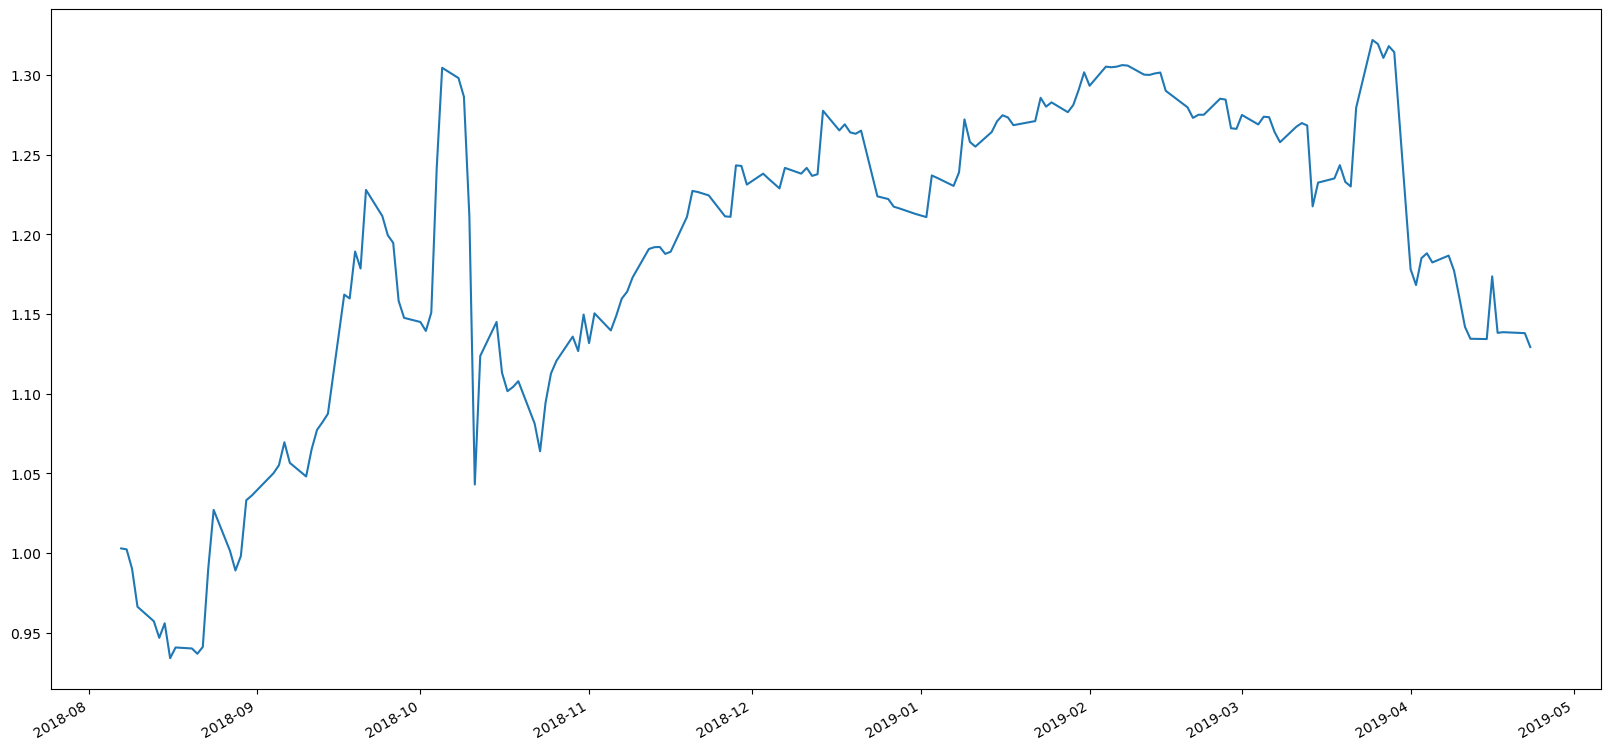

In [474]:
# Calculate and plot Beta
stocks_covariance = portfolio_portfolio_returns_df['STOCKS'].rolling(window=60).cov(portfolio_portfolio_returns_df['sp500'])
stocks_covariance.dropna(inplace=True)
#stocks_covariance
# Calculate variance of S&P 500
sp500_variance = portfolios_returns_df['sp500'].rolling(window=60).var()
sp500_variance.dropna(inplace=True)
#sp500_variance
# Computing beta
Stocks_rolling_beta = stocks_covariance/sp500_variance
# Plot beta trend
Stocks_rolling_beta.plot(figsize=(20,10))


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [475]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_2 = portfolio_portfolio_returns_df.mean()*252/(portfolio_portfolio_returns_df.std()*np.sqrt(252))

<AxesSubplot:>

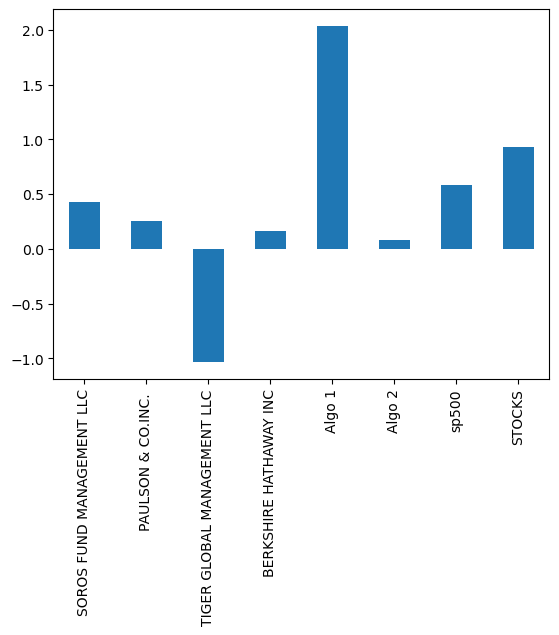

In [476]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot.bar()

### How does your portfolio do?

stocks portfolio did great! it beat everything except for algo1